Survived : Somebody who are survived in titanic 1 , somebody who aren't survived 0

Pclass : 1 : Statu of fare 1st = Upper 2nd = Middle 3rd = Lower

Sex : Male/Female

Age : Passanger's ages

Sibsp : brother/sister (1 or 0)

Parch : parent/child (1 or 0)

Fare : Ticket price

Embarked : Harbour names (C, Q, S)

Class : Class

Who : Man/Female

Adult_male : True/False

Deck : Deck

Embark Town : Harbour cities C = Cherbourg, Q = Queenstown, S = Southampton

Alive : Yes/No

Alone : True/False

In [150]:
import seaborn as sns
titanic = sns.load_dataset("titanic")
df = titanic.copy()
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [151]:
df.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True


In [152]:
#What is the data set story?

In [153]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.6+ KB


In [154]:
df[(df.age <= 18)]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False
10,1,3,female,4.0,1,1,16.7000,S,Third,child,False,G,Southampton,yes,False
14,0,3,female,14.0,0,0,7.8542,S,Third,child,False,NaN,Southampton,no,True
16,0,3,male,2.0,4,1,29.1250,Q,Third,child,False,NaN,Queenstown,no,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
852,0,3,female,9.0,1,1,15.2458,C,Third,child,False,NaN,Cherbourg,no,False
853,1,1,female,16.0,0,1,39.4000,S,First,woman,False,D,Southampton,yes,False
855,1,3,female,18.0,0,1,9.3500,S,Third,woman,False,NaN,Southampton,yes,False
869,1,3,male,4.0,1,1,11.1333,S,Third,child,False,NaN,Southampton,yes,False


In [155]:
df.age.max()

80.0

In [156]:
import pandas as pd
age = pd.cut(df["age"], [0,18,80])
df.pivot_table("adult_male", ["sex", age])

adult_male
sex    age                 
female (0, 18]      0.00000
       (18, 80]     0.00000
male   (0, 18]      0.43662
       (18, 80]     1.00000

The variable "adult_male" tells whether the person is an adult male. However, since we cannot call someone with the age range (0.18] "adult", we need to correct the value of 0.43662, which corresponds to our gender variable named "male".

In [157]:
index = df[(df.age <= 18)].index

In [158]:
index

Int64Index([  7,   9,  10,  14,  16,  22,  24,  38,  39,  43,
            ...
            831, 834, 841, 844, 850, 852, 853, 855, 869, 875],
           dtype='int64', length=139)

In [159]:
df.loc[(index, "adult_male")] = "False" 

In [160]:
df.head(50)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


The variable "survived", which is normally expected to be categorical, has been converted to 1s and 0s with the One Hot transformation. But there is also a dummy variable in the data set that corresponds to this. It's also the "alive" variable. Both of these variables present the same structural information. This suggests it could be a dummy variable trap. For this reason, we should remove the "alive" variable from the data set, since there should be -1 dummy variables in the data set.

In [161]:
df.drop('alive', axis=1, inplace = True) #Tüm alive değişkeni çıktı. 0'ın yaşamıyor, 1'in yaşıyor anlamında olduğu bilgisi 
#survived değişkeninde kalmaya devam ediyor.

In [162]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,True


In [163]:
#the relationship between "age" and "who":
df.groupby("who")["age"].count()

who
child     83
man      413
woman    218
Name: age, dtype: int64

In [164]:
new_age = pd.cut(df["age"], [0,17,80])
df.pivot_table("survived", ["sex", new_age], "who") #age is a discrete data. 
#Anyone aged 18 and over can be "woman" or "man", but not be "child". There is a problem here too. 
#For the range (0,17], they are all "child".

who                 child       man     woman
sex    age                                   
female (0, 17]   0.651163       NaN  0.833333
       (17, 80]       NaN       NaN  0.771845
male   (0, 17]   0.525000  0.111111       NaN
       (17, 80]       NaN  0.177215       NaN

In [165]:
#Then we have to say that regardless of gender, if the age is less than 18, set the "who" variable to "child" directly:

In [166]:
new_index = df[(df.age < 18)].index
df.loc[new_index, "who"] = "child"

In [167]:
df[(df.age < 18)] 

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alone
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,False
10,1,3,female,4.0,1,1,16.7000,S,Third,child,False,G,Southampton,False
14,0,3,female,14.0,0,0,7.8542,S,Third,child,False,NaN,Southampton,True
16,0,3,male,2.0,4,1,29.1250,Q,Third,child,False,NaN,Queenstown,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
850,0,3,male,4.0,4,2,31.2750,S,Third,child,False,NaN,Southampton,False
852,0,3,female,9.0,1,1,15.2458,C,Third,child,False,NaN,Cherbourg,False
853,1,1,female,16.0,0,1,39.4000,S,First,child,False,D,Southampton,False
869,1,3,male,4.0,1,1,11.1333,S,Third,child,False,NaN,Southampton,False


In [168]:
df.groupby("who")["age"].count() #Yeni dağılım:

who
child    113
man      395
woman    206
Name: age, dtype: int64

We converted from object data type to categorical data type:

In [169]:
import pandas as pd
df.sex = pd.Categorical(df.sex)
df.embarked = pd.Categorical(df.embarked)
df.who = pd.Categorical(df.who)
df.embark_town = pd.Categorical(df.embark_town)
df.alone = pd.Categorical(df.alone)
df.adult_male = pd.Categorical(df.adult_male)

In [170]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    category
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    category
 8   class        891 non-null    category
 9   who          891 non-null    category
 10  adult_male   891 non-null    category
 11  deck         203 non-null    category
 12  embark_town  889 non-null    category
 13  alone        891 non-null    category
dtypes: category(8), float64(2), int64(4)
memory usage: 49.9 KB


In [171]:
df.shape

(891, 14)

In [172]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
sibsp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [173]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alone            0
dtype: int64

**I have to examine why the dataset contains NaN values.**

In [174]:
df[df.isnull().any(axis = 1)]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,True
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
884,0,3,male,25.0,0,0,7.0500,S,Third,man,True,NaN,Southampton,True
885,0,3,female,39.0,0,5,29.1250,Q,Third,woman,False,NaN,Queenstown,False
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,False


In [175]:
df["deck"].value_counts()

C    59
B    47
D    33
E    32
A    15
F    13
G     4
Name: deck, dtype: int64

In [176]:
df["deck"].unique()

[NaN, 'C', 'E', 'G', 'D', 'A', 'B', 'F']
Categories (7, object): ['C', 'E', 'G', 'D', 'A', 'B', 'F']

In [177]:
df[df.notnull().all(axis=1)]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alone
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,False
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,False
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,True
10,1,3,female,4.0,1,1,16.7000,S,Third,child,False,G,Southampton,False
11,1,1,female,58.0,0,0,26.5500,S,First,woman,False,C,Southampton,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,1,1,female,47.0,1,1,52.5542,S,First,woman,False,D,Southampton,False
872,0,1,male,33.0,0,0,5.0000,S,First,man,True,B,Southampton,True
879,1,1,female,56.0,0,1,83.1583,C,First,woman,False,C,Cherbourg,False
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,True


In [178]:
!pip install missingno

In [179]:
import missingno as msno

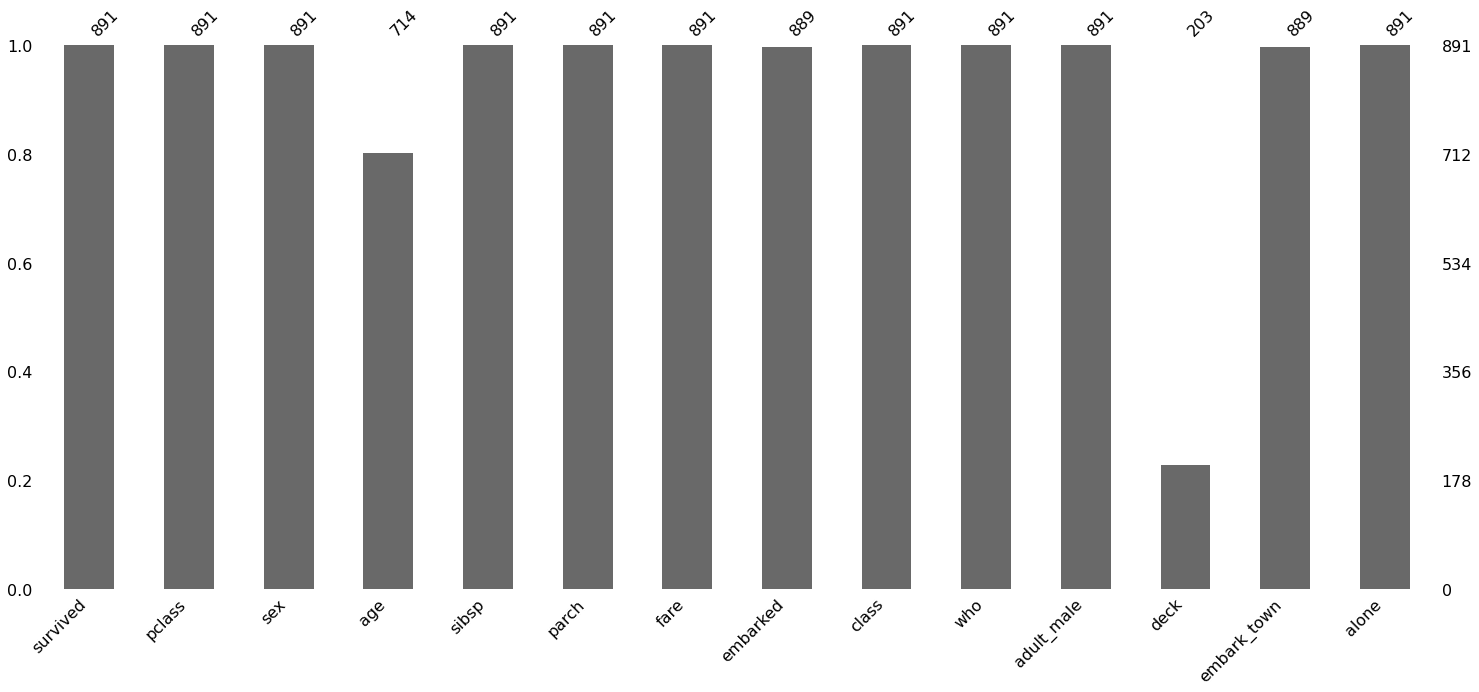

In [180]:
msno.bar(df);

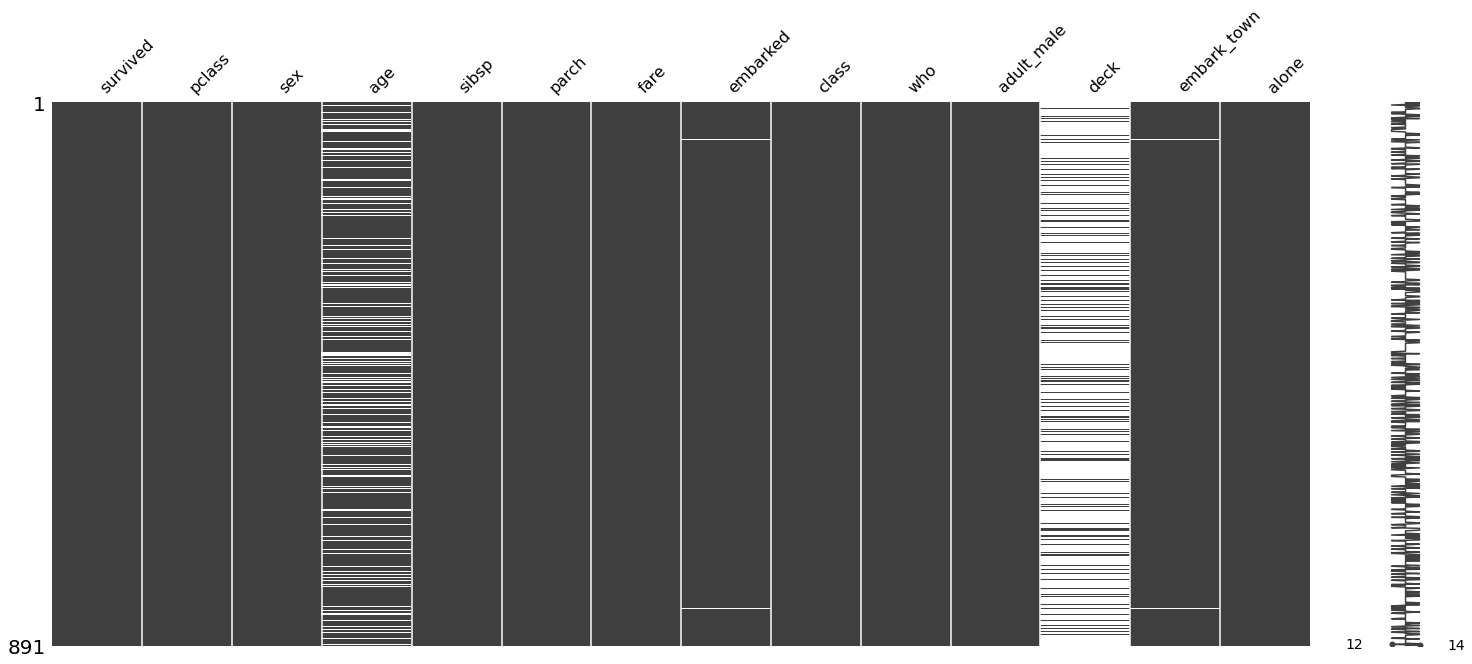

In [181]:
msno.matrix(df);

It seems that they distrubute randomly

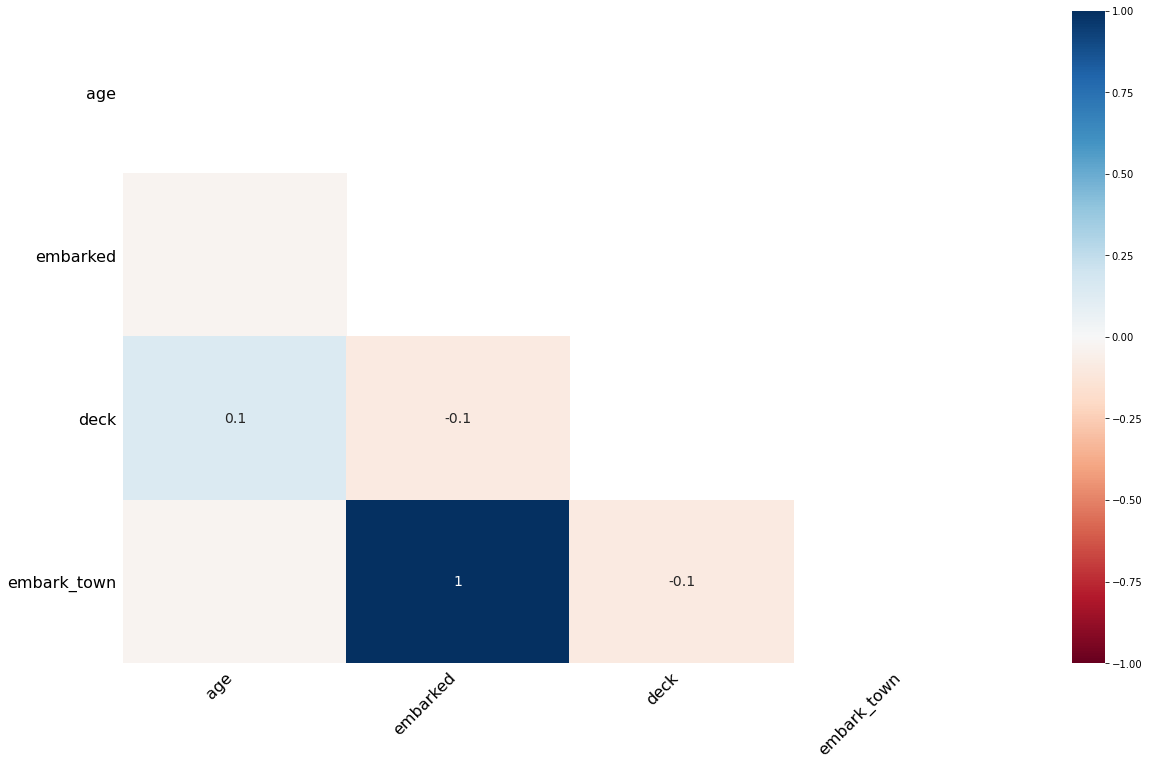

In [182]:
msno.heatmap(df); #There is no correlation

Missing observations can be deleted or filled because the "deck" variable is not related.

In [183]:
#Decision: A variable with so many missing values will most likely not work correctly. 
#It might make sense to remove this variable from the dataset. Because about 80% of data is missing.
df.drop('deck', axis=1, inplace = True)

In [184]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,Southampton,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,Southampton,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,Southampton,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,Cherbourg,True


In [185]:
import numpy as np
df[df['embarked'].isna()]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alone
61,1,1,female,38.0,0,0,80.0,NaN,First,woman,False,NaN,True
829,1,1,female,62.0,0,0,80.0,NaN,First,woman,False,NaN,True


In [186]:
df.dropna(subset=['embarked'], how='all', inplace = True)

In [187]:
df #We now have 889 observations. 
#The 2 NaN variables in embark_town that depended on it must have flown from the dataset because they were dependent on each other, their correlation was 1.

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,Southampton,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,Southampton,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,Southampton,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,Cherbourg,True


In [188]:
df.isnull().sum() 

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         0
class            0
who              0
adult_male       0
embark_town      0
alone            0
dtype: int64

We can assign a value for the variable age or use one of the estimation methods. But first, let's see if there are any outliers as this can cause bias if there are outliers in the data set:

In [189]:
#For this, let's first visualize the age variable in a boxplot:

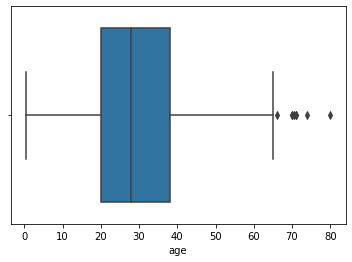

In [190]:
df_age = df["age"]
sns.boxplot(x = df_age); # As you can see, there are outliers.

In [191]:
Q1 = df_age.quantile(0.25)
Q3 = df_age.quantile(0.75)
IQR = Q3-Q1

In [192]:
Q1

20.0

In [193]:
Q3

38.0

In [194]:
IQR

18.0

In [195]:
lower_level = Q1- 1.5*IQR
upper_level = Q3 + 1.5*IQR

In [196]:
lower_level

-7.0

In [197]:
upper_level

65.0

In [198]:
(df_age < lower_level) | (df_age > upper_level)

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Name: age, Length: 889, dtype: bool

In [199]:
outlier = (df_age > upper_level)

In [200]:
df_age[outlier]

33     66.0
96     71.0
116    70.5
493    71.0
630    80.0
672    70.0
745    70.0
851    74.0
Name: age, dtype: float64

In [201]:
#We can use delete, fill or fill with the nearest min, max point to solve this outlier problem. 
#I generally use fill with the nearest min, max point the most because it makes more sense to me.

In [202]:
df_age[outlier] = upper_level

<ipython-input-202-acbb54952949>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_age[outlier] = upper_level


In [203]:
df_age[outlier]

33     65.0
96     65.0
116    65.0
493    65.0
630    65.0
672    65.0
745    65.0
851    65.0
Name: age, dtype: float64

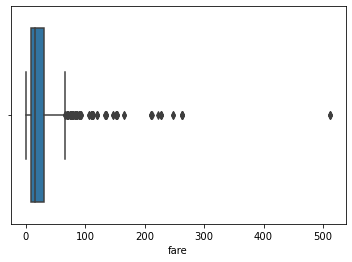

In [204]:
df_fare = df["fare"]
sns.boxplot(x = df_fare); 

In [205]:
Q1 = df_age.quantile(0.25)
Q3 = df_age.quantile(0.75)
IQR = Q3-Q1

In [206]:
lower_level_1 = Q1- 1.5*IQR
upper_level_1 = Q3 + 1.5*IQR

In [207]:
upper_level_1

65.0

In [208]:
outlier_1 = (df_fare > upper_level_1)

In [209]:
df_fare[outlier_1] = upper_level_1

<ipython-input-209-81069ac2dcec>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fare[outlier_1] = upper_level_1


In [210]:
df.fare[outlier_1]

1      65.0
27     65.0
31     65.0
34     65.0
52     65.0
       ... 
846    65.0
849    65.0
856    65.0
863    65.0
879    65.0
Name: fare, Length: 114, dtype: float64

In [211]:
# Thus, outlier observations were not left in the data set.
#Now, before filling the age variable with the Knn algorithm, which is one of the machine learning methods, 
#we need to convert the categorical variables in the data set into 0-1s, which the machine can understand.

In [212]:
df #sex, embarked, class, who, adult_male, embark_town, alive ve alone must be changed.

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alone
0,0,3,male,22.0,1,0,7.250,S,Third,man,True,Southampton,False
1,1,1,female,38.0,1,0,65.000,C,First,woman,False,Cherbourg,False
2,1,3,female,26.0,0,0,7.925,S,Third,woman,False,Southampton,True
3,1,1,female,35.0,1,0,53.100,S,First,woman,False,Southampton,False
4,0,3,male,35.0,0,0,8.050,S,Third,man,True,Southampton,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.000,S,Second,man,True,Southampton,True
887,1,1,female,19.0,0,0,30.000,S,First,woman,False,Southampton,True
888,0,3,female,NaN,1,2,23.450,S,Third,woman,False,Southampton,False
889,1,1,male,26.0,0,0,30.000,C,First,man,True,Cherbourg,True


In [213]:
from sklearn.preprocessing import LabelEncoder
lbe = LabelEncoder()

In [214]:
lbe.fit_transform(df["sex"]) 

array([1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1,

In [215]:
df["sex"] = lbe.fit_transform(df["sex"])

In [216]:
df #male: 1 , female: 0

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alone
0,0,3,1,22.0,1,0,7.250,S,Third,man,True,Southampton,False
1,1,1,0,38.0,1,0,65.000,C,First,woman,False,Cherbourg,False
2,1,3,0,26.0,0,0,7.925,S,Third,woman,False,Southampton,True
3,1,1,0,35.0,1,0,53.100,S,First,woman,False,Southampton,False
4,0,3,1,35.0,0,0,8.050,S,Third,man,True,Southampton,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.000,S,Second,man,True,Southampton,True
887,1,1,0,19.0,0,0,30.000,S,First,woman,False,Southampton,True
888,0,3,0,NaN,1,2,23.450,S,Third,woman,False,Southampton,False
889,1,1,1,26.0,0,0,30.000,C,First,man,True,Cherbourg,True


In [217]:
df["alone"] = lbe.fit_transform(df["alone"])

In [218]:
df #Alone true: 1, alone false: 0 

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alone
0,0,3,1,22.0,1,0,7.250,S,Third,man,True,Southampton,0
1,1,1,0,38.0,1,0,65.000,C,First,woman,False,Cherbourg,0
2,1,3,0,26.0,0,0,7.925,S,Third,woman,False,Southampton,1
3,1,1,0,35.0,1,0,53.100,S,First,woman,False,Southampton,0
4,0,3,1,35.0,0,0,8.050,S,Third,man,True,Southampton,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.000,S,Second,man,True,Southampton,1
887,1,1,0,19.0,0,0,30.000,S,First,woman,False,Southampton,1
888,0,3,0,NaN,1,2,23.450,S,Third,woman,False,Southampton,0
889,1,1,1,26.0,0,0,30.000,C,First,man,True,Cherbourg,1


In [219]:
df["adult_male"] = lbe.fit_transform(df["adult_male"].astype(str))

In [220]:
df #True: 1 , False: 0

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alone
0,0,3,1,22.0,1,0,7.250,S,Third,man,1,Southampton,0
1,1,1,0,38.0,1,0,65.000,C,First,woman,0,Cherbourg,0
2,1,3,0,26.0,0,0,7.925,S,Third,woman,0,Southampton,1
3,1,1,0,35.0,1,0,53.100,S,First,woman,0,Southampton,0
4,0,3,1,35.0,0,0,8.050,S,Third,man,1,Southampton,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.000,S,Second,man,1,Southampton,1
887,1,1,0,19.0,0,0,30.000,S,First,woman,0,Southampton,1
888,0,3,0,NaN,1,2,23.450,S,Third,woman,0,Southampton,0
889,1,1,1,26.0,0,0,30.000,C,First,man,1,Cherbourg,1


Categorical variables remained. We need to examine these variables with the one hot encoding method:
One Hot Encoding is a process in the data processing that is applied to categorical data, to convert it into a binary vector representation for use in machine learning algorithms

Integer Encoding: encodes the values as integer.
One-Hot Encoding: encodes the values as a binary vector array.
Dummy Variable Encoding: same as One-Hot Encoding, but one less column.

Ordinal variables should be treated differently in machine learning because the ordinality generally comes with some significance. In the case of class, the passengers tend to pay higher fare. Integer Encoding is used to convert ordinal variable to numerical data

In [221]:
mapping_dictionary = { "First" : 1,
                       "Second": 2,
                       "Third" : 3 
}

In [222]:
new_class = df["class"].map(mapping_dictionary)

In [223]:
df["class"] = new_class

In [224]:
df # 1, first class; 2, second class; 3, third class.

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alone
0,0,3,1,22.0,1,0,7.250,S,3,man,1,Southampton,0
1,1,1,0,38.0,1,0,65.000,C,1,woman,0,Cherbourg,0
2,1,3,0,26.0,0,0,7.925,S,3,woman,0,Southampton,1
3,1,1,0,35.0,1,0,53.100,S,1,woman,0,Southampton,0
4,0,3,1,35.0,0,0,8.050,S,3,man,1,Southampton,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.000,S,2,man,1,Southampton,1
887,1,1,0,19.0,0,0,30.000,S,1,woman,0,Southampton,1
888,0,3,0,NaN,1,2,23.450,S,3,woman,0,Southampton,0
889,1,1,1,26.0,0,0,30.000,C,1,man,1,Cherbourg,1


In [225]:
df.drop("pclass", axis = 1, inplace = True)

In [226]:
#if we move on to categorical variables

In [227]:
embark_town_dummies = pd.get_dummies(df.embark_town , prefix = "e_town", drop_first=True)

In [228]:
 #it has got 3 class. In order not to get caught in the dummy variable trap, we should keep 2 variables in the data set.

In [229]:
embark_town_dummies

,e_town_Queenstown,e_town_Southampton
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
...,...,...
886,0,1
887,0,1
888,0,1
889,0,0


In [230]:
#Now we have to concatenate it with the main data frame:

In [231]:
df = pd.concat([df, embark_town_dummies], axis=1)

In [232]:
df

,survived,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alone,e_town_Queenstown,e_town_Southampton
0,0,1,22.0,1,0,7.250,S,3,man,1,Southampton,0,0,1
1,1,0,38.0,1,0,65.000,C,1,woman,0,Cherbourg,0,0,0
2,1,0,26.0,0,0,7.925,S,3,woman,0,Southampton,1,0,1
3,1,0,35.0,1,0,53.100,S,1,woman,0,Southampton,0,0,1
4,0,1,35.0,0,0,8.050,S,3,man,1,Southampton,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,1,27.0,0,0,13.000,S,2,man,1,Southampton,1,0,1
887,1,0,19.0,0,0,30.000,S,1,woman,0,Southampton,1,0,1
888,0,0,NaN,1,2,23.450,S,3,woman,0,Southampton,0,0,1
889,1,1,26.0,0,0,30.000,C,1,man,1,Cherbourg,1,0,0


In [233]:
df.drop("embark_town", axis = 1, inplace = True)

In [234]:
df

,survived,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,alone,e_town_Queenstown,e_town_Southampton
0,0,1,22.0,1,0,7.250,S,3,man,1,0,0,1
1,1,0,38.0,1,0,65.000,C,1,woman,0,0,0,0
2,1,0,26.0,0,0,7.925,S,3,woman,0,1,0,1
3,1,0,35.0,1,0,53.100,S,1,woman,0,0,0,1
4,0,1,35.0,0,0,8.050,S,3,man,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,1,27.0,0,0,13.000,S,2,man,1,1,0,1
887,1,0,19.0,0,0,30.000,S,1,woman,0,1,0,1
888,0,0,NaN,1,2,23.450,S,3,woman,0,0,0,1
889,1,1,26.0,0,0,30.000,C,1,man,1,1,0,0


In [235]:
embarked_dummies = pd.get_dummies(df.embarked , prefix = "embarked", drop_first=True)

In [236]:
embarked_dummies

,embarked_Q,embarked_S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
...,...,...
886,0,1
887,0,1
888,0,1
889,0,0


In [237]:
df = pd.concat([df, embarked_dummies], axis = 1)

In [238]:
df

,survived,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,alone,e_town_Queenstown,e_town_Southampton,embarked_Q,embarked_S
0,0,1,22.0,1,0,7.250,S,3,man,1,0,0,1,0,1
1,1,0,38.0,1,0,65.000,C,1,woman,0,0,0,0,0,0
2,1,0,26.0,0,0,7.925,S,3,woman,0,1,0,1,0,1
3,1,0,35.0,1,0,53.100,S,1,woman,0,0,0,1,0,1
4,0,1,35.0,0,0,8.050,S,3,man,1,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,1,27.0,0,0,13.000,S,2,man,1,1,0,1,0,1
887,1,0,19.0,0,0,30.000,S,1,woman,0,1,0,1,0,1
888,0,0,NaN,1,2,23.450,S,3,woman,0,0,0,1,0,1
889,1,1,26.0,0,0,30.000,C,1,man,1,1,0,0,0,0


In [239]:
 #If both of them 0, we need to understand that the town is Chersburg.

In [240]:
df.drop("embarked", axis = 1, inplace = True)

In [241]:
who_dummies = pd.get_dummies(df.who , prefix = "who", drop_first=True)

In [242]:
who_dummies #we dropped the "child"

,who_man,who_woman
0,1,0
1,0,1
2,0,1
3,0,1
4,1,0
...,...,...
886,1,0
887,0,1
888,0,1
889,1,0


In [243]:
df = pd.concat([df,who_dummies], axis = 1)

In [244]:
df.drop("who", axis = 1, inplace = True)

In [245]:
df

,survived,sex,age,sibsp,parch,fare,class,adult_male,alone,e_town_Queenstown,e_town_Southampton,embarked_Q,embarked_S,who_man,who_woman
0,0,1,22.0,1,0,7.250,3,1,0,0,1,0,1,1,0
1,1,0,38.0,1,0,65.000,1,0,0,0,0,0,0,0,1
2,1,0,26.0,0,0,7.925,3,0,1,0,1,0,1,0,1
3,1,0,35.0,1,0,53.100,1,0,0,0,1,0,1,0,1
4,0,1,35.0,0,0,8.050,3,1,1,0,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,1,27.0,0,0,13.000,2,1,1,0,1,0,1,1,0
887,1,0,19.0,0,0,30.000,1,0,1,0,1,0,1,0,1
888,0,0,NaN,1,2,23.450,3,0,0,0,1,0,1,0,1
889,1,1,26.0,0,0,30.000,1,1,1,0,0,0,0,1,0


In [246]:
#Knn algorithm for "age" variable

In [247]:
from ycimpute.imputer import knnimput #The knnimput function expects a numpy array.

In [248]:
var_names = list(df) 

In [249]:
var_names

['survived',
 'sex',
 'age',
 'sibsp',
 'parch',
 'fare',
 'class',
 'adult_male',
 'alone',
 'e_town_Queenstown',
 'e_town_Southampton',
 'embarked_Q',
 'embarked_S',
 'who_man',
 'who_woman']

In [250]:
n_df = np.array(df) #It became Numpy array

In [251]:
n_df[0:10]

array([[ 0.    ,  1.    , 22.    ,  1.    ,  0.    ,  7.25  ,  3.    ,
         1.    ,  0.    ,  0.    ,  1.    ,  0.    ,  1.    ,  1.    ,
         0.    ],
       [ 1.    ,  0.    , 38.    ,  1.    ,  0.    , 65.    ,  1.    ,
         0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,
         1.    ],
       [ 1.    ,  0.    , 26.    ,  0.    ,  0.    ,  7.925 ,  3.    ,
         0.    ,  1.    ,  0.    ,  1.    ,  0.    ,  1.    ,  0.    ,
         1.    ],
       [ 1.    ,  0.    , 35.    ,  1.    ,  0.    , 53.1   ,  1.    ,
         0.    ,  0.    ,  0.    ,  1.    ,  0.    ,  1.    ,  0.    ,
         1.    ],
       [ 0.    ,  1.    , 35.    ,  0.    ,  0.    ,  8.05  ,  3.    ,
         1.    ,  1.    ,  0.    ,  1.    ,  0.    ,  1.    ,  1.    ,
         0.    ],
       [ 0.    ,  1.    ,     nan,  0.    ,  0.    ,  8.4583,  3.    ,
         1.    ,  1.    ,  1.    ,  0.    ,  1.    ,  0.    ,  1.    ,
         0.    ],
       [ 0.    ,  1.    , 54.    ,  0.  

In [252]:
n_df.shape

(889, 15)

In [253]:
dff = knnimput.KNN(k = 4).complete(n_df)

Imputing row 1/889 with 0 missing, elapsed time: 0.155
Imputing row 101/889 with 1 missing, elapsed time: 0.156
Imputing row 201/889 with 1 missing, elapsed time: 0.157
Imputing row 301/889 with 1 missing, elapsed time: 0.158
Imputing row 401/889 with 0 missing, elapsed time: 0.158
Imputing row 501/889 with 0 missing, elapsed time: 0.160
Imputing row 601/889 with 1 missing, elapsed time: 0.161
Imputing row 701/889 with 0 missing, elapsed time: 0.161
Imputing row 801/889 with 0 missing, elapsed time: 0.162


In [254]:
type(dff) #Now we need to convert it to data frame

numpy.ndarray

In [255]:
dff = pd.DataFrame(dff, columns = var_names)

In [256]:
type(dff)

pandas.core.frame.DataFrame

In [257]:
dff.isnull().sum() #The deficiencies were corrected with the knn algorithm.

survived              0
sex                   0
age                   0
sibsp                 0
parch                 0
fare                  0
class                 0
adult_male            0
alone                 0
e_town_Queenstown     0
e_town_Southampton    0
embarked_Q            0
embarked_S            0
who_man               0
who_woman             0
dtype: int64

In [258]:
df

,survived,sex,age,sibsp,parch,fare,class,adult_male,alone,e_town_Queenstown,e_town_Southampton,embarked_Q,embarked_S,who_man,who_woman
0,0,1,22.0,1,0,7.250,3,1,0,0,1,0,1,1,0
1,1,0,38.0,1,0,65.000,1,0,0,0,0,0,0,0,1
2,1,0,26.0,0,0,7.925,3,0,1,0,1,0,1,0,1
3,1,0,35.0,1,0,53.100,1,0,0,0,1,0,1,0,1
4,0,1,35.0,0,0,8.050,3,1,1,0,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,1,27.0,0,0,13.000,2,1,1,0,1,0,1,1,0
887,1,0,19.0,0,0,30.000,1,0,1,0,1,0,1,0,1
888,0,0,NaN,1,2,23.450,3,0,0,0,1,0,1,0,1
889,1,1,26.0,0,0,30.000,1,1,1,0,0,0,0,1,0


In [259]:
dff

,survived,sex,age,sibsp,parch,fare,class,adult_male,alone,e_town_Queenstown,e_town_Southampton,embarked_Q,embarked_S,who_man,who_woman
0,0.0,1.0,22.000000,1.0,0.0,7.250,3.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
1,1.0,0.0,38.000000,1.0,0.0,65.000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1.0,0.0,26.000000,0.0,0.0,7.925,3.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
3,1.0,0.0,35.000000,1.0,0.0,53.100,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
4,0.0,1.0,35.000000,0.0,0.0,8.050,3.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
884,0.0,1.0,27.000000,0.0,0.0,13.000,2.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0
885,1.0,0.0,19.000000,0.0,0.0,30.000,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
886,0.0,0.0,32.665194,1.0,2.0,23.450,3.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
887,1.0,1.0,26.000000,0.0,0.0,30.000,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [260]:
df = dff

In [261]:
df #Final data frame

,survived,sex,age,sibsp,parch,fare,class,adult_male,alone,e_town_Queenstown,e_town_Southampton,embarked_Q,embarked_S,who_man,who_woman
0,0.0,1.0,22.000000,1.0,0.0,7.250,3.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
1,1.0,0.0,38.000000,1.0,0.0,65.000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1.0,0.0,26.000000,0.0,0.0,7.925,3.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
3,1.0,0.0,35.000000,1.0,0.0,53.100,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
4,0.0,1.0,35.000000,0.0,0.0,8.050,3.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
884,0.0,1.0,27.000000,0.0,0.0,13.000,2.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0
885,1.0,0.0,19.000000,0.0,0.0,30.000,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
886,0.0,0.0,32.665194,1.0,2.0,23.450,3.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
887,1.0,1.0,26.000000,0.0,0.0,30.000,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [262]:
#Data splitting:

In [263]:
from sklearn.model_selection import train_test_split  
X = df
y = df["fare"]

X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.2, random_state=0)  

In [353]:
#Feature Scaling, Normalization

1.Path:

In [266]:
#df_scaled = df.copy()

In [275]:
#from sklearn.preprocessing import MinMaxScaler  
#scaler = MinMaxScaler()
#df_scaled = scaler.fit_transform(df[["age", "fare"]])

In [276]:
#df_scaled

array([[0.33415918, 0.11153846],
       [0.58191391, 1.        ],
       [0.39609786, 0.12192308],
       ...,
       [0.4993062 , 0.36076923],
       [0.39609786, 0.46153846],
       [0.48900588, 0.11923077]])

In [283]:
#new_df = df[["age", "fare"]]

In [285]:
#df_scaled = pd.DataFrame(scaler.fit_transform(new_df))

In [286]:
#df_scaled

,0,1
0,0.334159,0.111538
1,0.581914,1.000000
2,0.396098,0.121923
3,0.535460,0.816923
4,0.535460,0.123846
...,...,...
884,0.411583,0.200000
885,0.287705,0.461538
886,0.499306,0.360769
887,0.396098,0.461538


In [316]:
#df_scaled.columns = ["a", "f"]

In [317]:
#df_scaled

,a,f
0,0.334159,0.111538
1,0.581914,1.000000
2,0.396098,0.121923
3,0.535460,0.816923
4,0.535460,0.123846
...,...,...
884,0.411583,0.200000
885,0.287705,0.461538
886,0.499306,0.360769
887,0.396098,0.461538


In [318]:
#concat_df = pd.concat([df, df_scaled], axis = 1)

In [320]:
#concat_df.drop(["age", "fare"], axis = 1, inplace = True)

In [339]:
#concat_df.rename(columns={'a':'age'}, inplace = True)

In [342]:
#concat_df.rename(columns={'f':'fare'}, inplace = True)

In [344]:
#df = concat_df

In [346]:
#df

2. Path

In [347]:
df_normalize = df.copy()
df_normalize[["age", "fare"]] = sklearn.preprocessing.minmax_scale(df[["age", "fare"]])

In [348]:
df_normalize[["age", "fare"]].values

array([[0.33415918, 0.11153846],
       [0.58191391, 1.        ],
       [0.39609786, 0.12192308],
       ...,
       [0.4993062 , 0.36076923],
       [0.39609786, 0.46153846],
       [0.48900588, 0.11923077]])

In [349]:
df_normalize

,survived,sex,sibsp,parch,class,adult_male,alone,e_town_Queenstown,e_town_Southampton,embarked_Q,embarked_S,who_man,who_woman,age,fare
0,0.0,1.0,1.0,0.0,3.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.334159,0.111538
1,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.581914,1.000000
2,1.0,0.0,0.0,0.0,3.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.396098,0.121923
3,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.535460,0.816923
4,0.0,1.0,0.0,0.0,3.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.535460,0.123846
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
884,0.0,1.0,0.0,0.0,2.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.411583,0.200000
885,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.287705,0.461538
886,0.0,0.0,1.0,2.0,3.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.499306,0.360769
887,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.396098,0.461538


In [350]:
df = df_normalize

In [351]:
df

,survived,sex,sibsp,parch,class,adult_male,alone,e_town_Queenstown,e_town_Southampton,embarked_Q,embarked_S,who_man,who_woman,age,fare
0,0.0,1.0,1.0,0.0,3.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.334159,0.111538
1,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.581914,1.000000
2,1.0,0.0,0.0,0.0,3.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.396098,0.121923
3,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.535460,0.816923
4,0.0,1.0,0.0,0.0,3.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.535460,0.123846
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
884,0.0,1.0,0.0,0.0,2.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.411583,0.200000
885,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.287705,0.461538
886,0.0,0.0,1.0,2.0,3.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.499306,0.360769
887,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.396098,0.461538
